# Analysis of each Task 

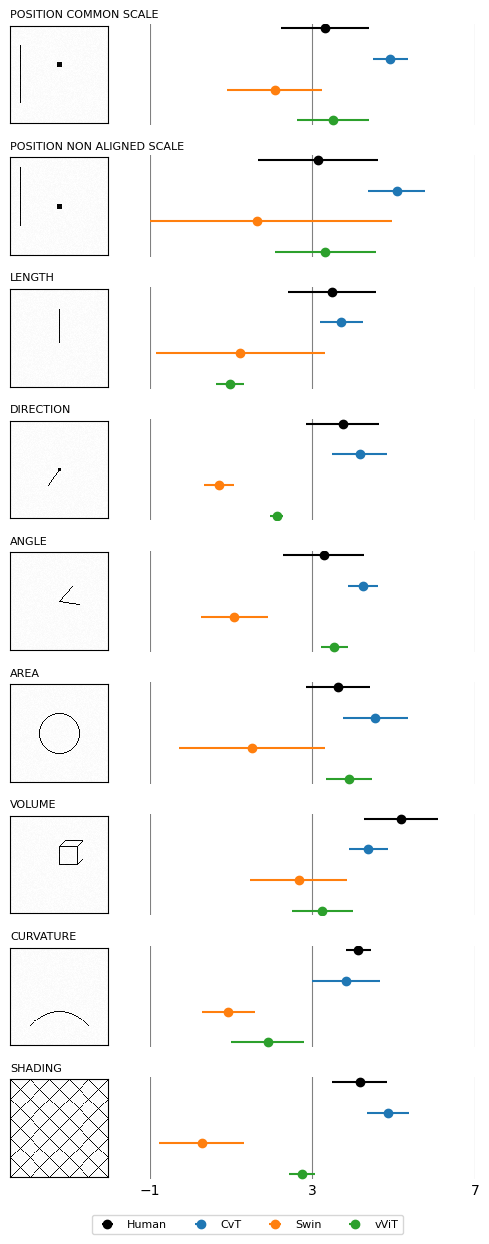

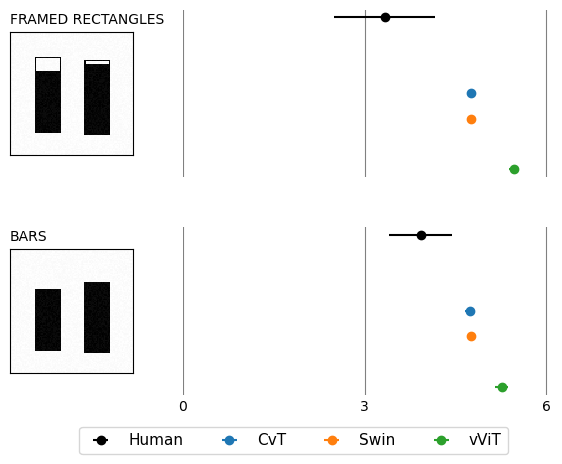

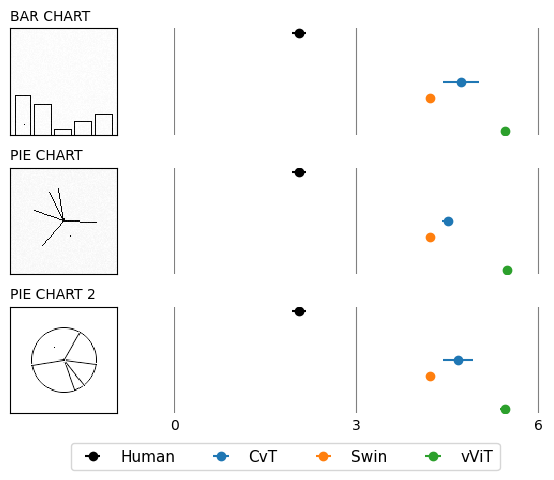

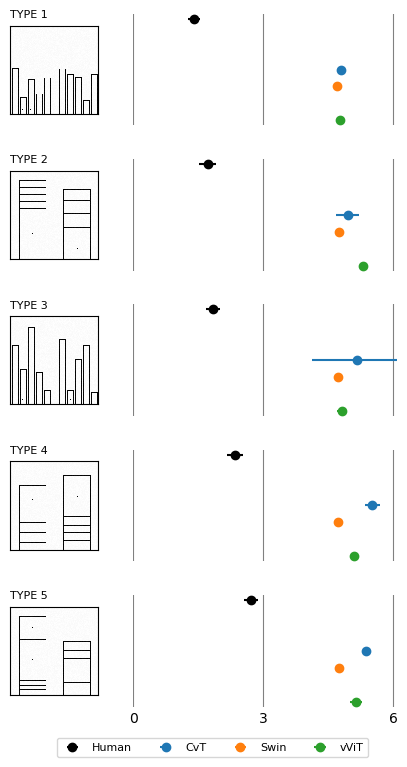

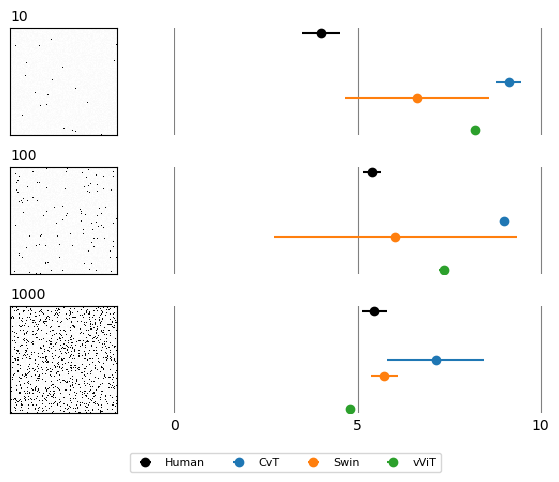

In [1]:
from IPython.display import display, IFrame
import runpy
import os
import sys
PROJECT_ROOT = os.path.abspath(os.path.join(os.getcwd(), "../../"))
if PROJECT_ROOT not in sys.path:
    sys.path.append(PROJECT_ROOT)
from src.ClevelandMcGill.figure1 import Figure1
from src.ClevelandMcGill.figure12 import Figure12
from src.ClevelandMcGill.figure3 import Figure3
from src.ClevelandMcGill.figure4 import Figure4
from src.ClevelandMcGill.weber import Weber

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import textwrap



def run_and_show(module: str, pdf_path: str, height: int = 900):
    runpy.run_module(module, run_name="__main__")
    
run_and_show("Figure1_Analysis",  "figure1.pdf")
run_and_show("Figure12_Analysis", "bf_analysis.pdf")
run_and_show("Figure3_Analysis",  "pa_analysis.pdf")
run_and_show("Figure4_Analysis",  "pl_analysis.pdf")
run_and_show("Weber_Analysis",    "weber_analysis.pdf")

# Analysis of Mean performance of ViTs

/tmp/ipykernel_21493/2720553699.py:56: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  line_color = plt.cm.get_cmap('tab10')(idx - 1)


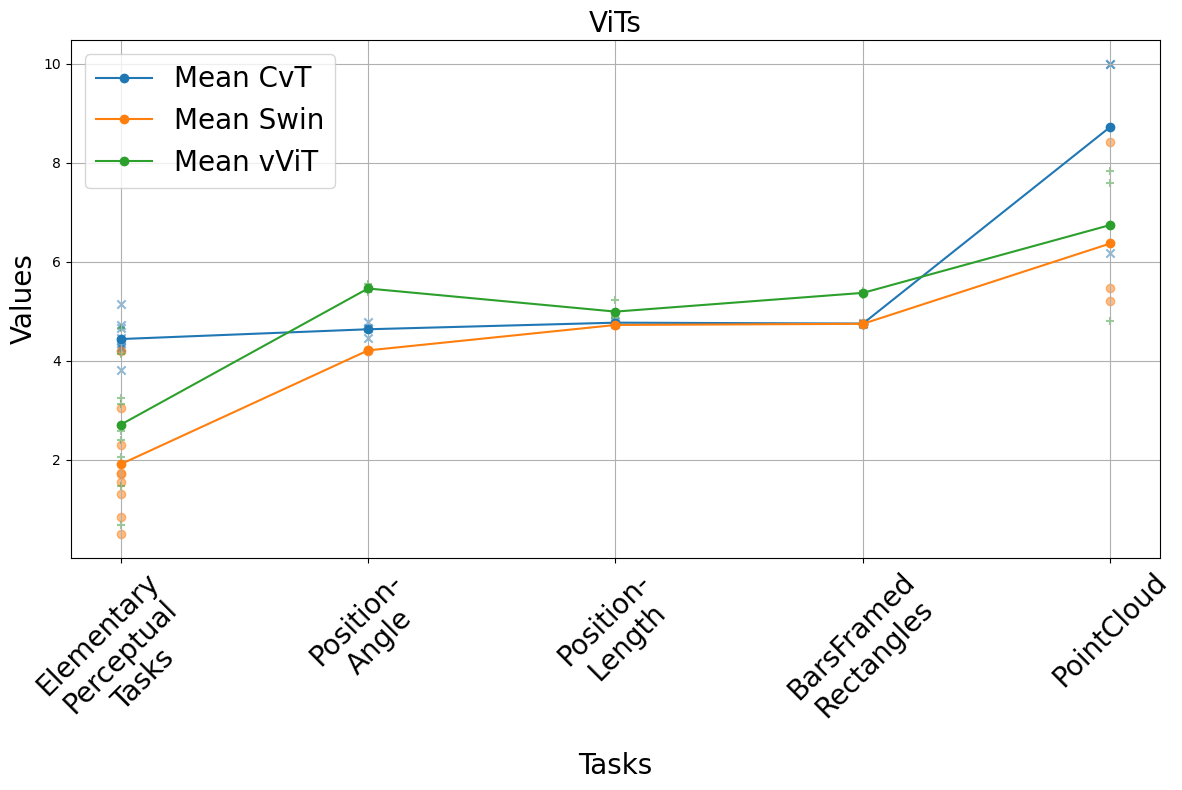

In [2]:
data_sets = [
    
    {
        'name': 'CvT',
        'marker': 'x',
        'color': 'blue',
       'data': {
            'ElementaryPerceptualTasks': [{'pcs': 4.66}, {'pnas': 4.73}, {'len': 3.81}, {'dir': 4.35}, {'ang': 4.29}, 
                                         {'are': 5.15},
                                         {'vol': 4.24}, {'cur': 4.28}, {'sha': 4.47}],
            'Position-Angle': [{'bar': 4.79}, {'pie': 4.46}, {'pie_aa': 4.67}],
            'Position-Length': [{'type1': 4.74}, {'type2': 4.77}, {'type3': 4.81}],
            'BarsFramedRectangles': [{'fullbar': 4.74}, {'rectangle': 4.77}],
            'PointCloud': [{'base10': 10}, {'base100': 10}, {'base1000': 6.19}]
        }
    },
    {
        'name': 'Swin',
        'marker': 'o',
        'color': 'green',
        'data': {
            'ElementaryPerceptualTasks': [{'pcs': 3.05}, {'pnas': 4.20}, {'len': 2.30}, {'dir': 0.84}, {'ang': 1.74},
                                         {'are': 1.56},
                                         {'vol': 1.72}, {'cur': 1.31}, {'sha': 0.50}],
            'Position-Angle': [{'bar': 4.22}, {'pie': 4.21}, {'pie_aa': 4.21}],
            'Position-Length': [{'type1': 4.72}, {'type2': 4.74}, {'type3': 4.72}],
            'BarsFramedRectangles': [{'fullbar': 4.76}, {'rectangle': 4.74}],
            'PointCloud': [{'base10': 5.21}, {'base100': 8.43}, {'base1000': 5.48}]
        }
    }, 
    {
        'name': 'vViT',
        'marker': '+',
        'color': 'red',
         'data': {
            'ElementaryPerceptualTasks': [{'pcs': 3.26}, {'pnas': 2.40}, {'len': 0.68}, {'dir': 2.07}, {'ang': 4.67}, 
                                         {'are': 4.14},
                                         {'vol': 2.58}, {'cur': 1.47}, {'sha': 3.13}],
            'Position-Angle': [{'bar': 5.56}, {'pie': 5.39}, {'pie_aa': 5.44}],
            'Position-Length': [{'type1': 4.90}, {'type2': 5.23}, {'type3': 4.86}],
            'BarsFramedRectangles': [{'fullbar': 5.33}, {'rectangle': 5.42}],
            'PointCloud': [{'base10': 7.84}, {'base100': 7.60}, {'base1000': 4.80}]
        }
    }
]

plt.figure(figsize=(12, 8))

for idx, dataset in enumerate(data_sets, start=1):
    marker_style = dataset['marker']
    tasks = list(dataset['data'].keys())
    subtask_values = {task: [list(subtask.values())[0] for subtask in dataset['data'][task]] for task in tasks}

    # Calculate mean values for each task
    mean_values = np.array([np.mean(subtask_values[task]) for task in tasks])
    line_color = plt.cm.get_cmap('tab10')(idx - 1)  
    lightened_color = mcolors.to_rgba(line_color)
    plt.plot(tasks, mean_values, marker='o', linestyle='-', label=f'Mean {dataset["name"]}', color=lightened_color)
    for i, task in enumerate(tasks):
        plt.scatter([task] * len(subtask_values[task]), subtask_values[task], marker=marker_style, label=None, 
                    color=line_color, alpha=0.5)

# Wrap x-tick labels
custom_labels = [textwrap.fill(task, 10) for task in tasks]  
plt.xticks(tasks, custom_labels, rotation=45, fontsize=20)  

plt.xlabel('Tasks', fontsize=20)
plt.ylabel('Values', fontsize=20)
plt.title('ViTs',fontsize=20)
plt.legend(fontsize=20)
plt.grid(True)
plt.tight_layout()

plt.show()


# Analysis of mean performance for CNNs 

/tmp/ipykernel_21493/2387129324.py:72: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  line_color = plt.cm.get_cmap('tab10')(idx - 1)  # Use the same color as lines


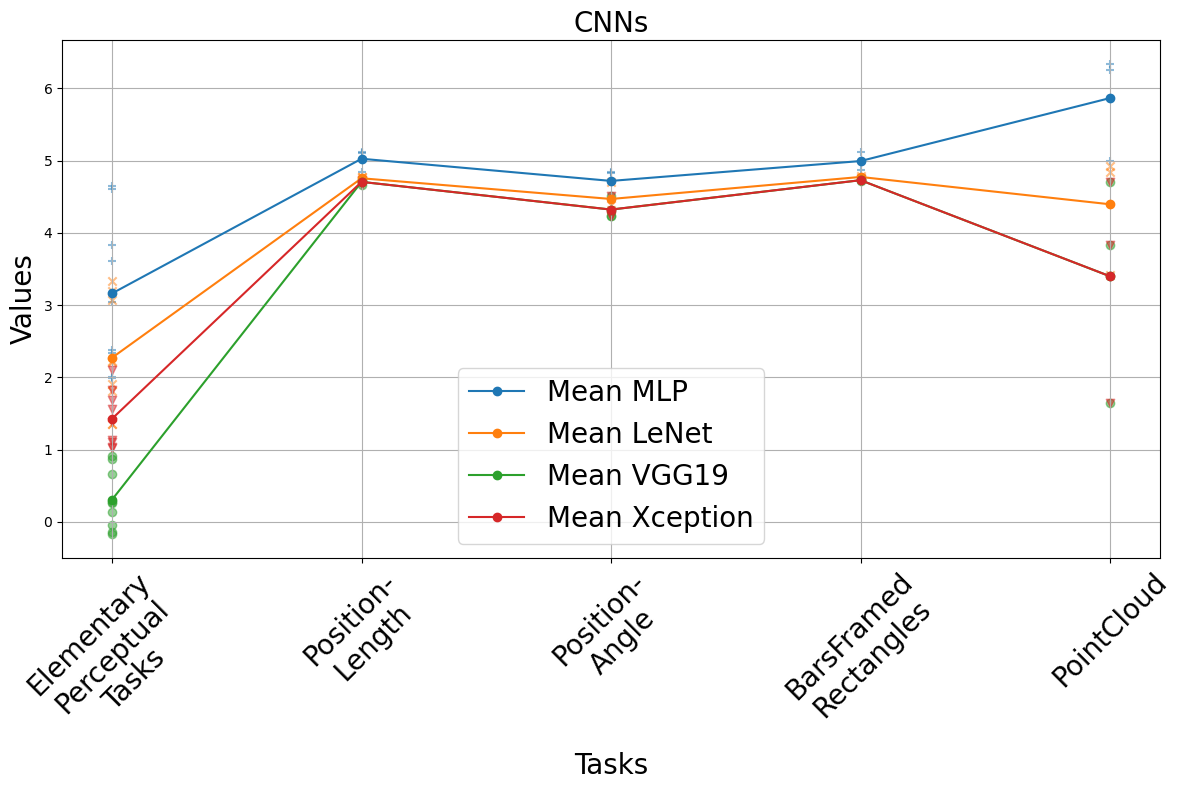

In [3]:
# data for CNNs from Daniel Hahen's study

data_sets = [
    {
        'name': 'MLP',
        'marker': '+',
        'color': 'red',
         'data': {
            'ElementaryPerceptualTasks': [{'pcs': 3.84}, {'pnas': 3.61}, {'len': 1.99}, {'dir': 4.65}, {'ang': 4.61}, 
                                         {'are': 2.01}, {'vol':2.38}, {'cur': 2.34}, {'sha': 3.04}],
           
            'Position-Length': [{'type1': 5.12}, {'type2': 5.11}, {'type3': 4.85}],
            'Position-Angle': [{'bar': 4.83}, {'pie': 4.48}, {'pie_aa': 4.85}],
            'BarsFramedRectangles': [{'fullbar': 5.12}, {'rectangle': 4.87}],
            'PointCloud': [{'base10': 6.26}, {'base100': 6.34}, {'base1000': 5.00}]
        }
    },
    {
        'name': 'LeNet',
        'marker': 'x',
        'color': 'blue',
        'data': {
            'ElementaryPerceptualTasks': [{'pcs': 1.36}, {'pnas': 1.35}, {'len': 3.19}, {'dir':3.07}, {'ang': 3.33},
                                         {'are': 2.21},{'vol': 1.91}, {'cur': 1.81}, {'sha': 2.23}],
            'Position-Length': [{'type1': 4.77}, {'type2': 4.73}, {'type3': 4.77}],
            'Position-Angle': [{'bar': 4.39}, {'pie': 4.32}, {'pie_aa': 4.70}],
            'BarsFramedRectangles': [{'fullbar': 4.76}, {'rectangle': 4.79}],
            'PointCloud': [{'base10': 4.93}, {'base100': 3.42}, {'base1000': 4.84}]
        }
    },
    {
        'name': 'VGG19',
        'marker': 'o',
        'color': 'green',
        'data': {
            'ElementaryPerceptualTasks': [{'pcs': -0.04}, {'pnas': 0.26}, {'len': -0.14}, {'dir': 0.92}, {'ang': 0.66}, 
                                         {'are':-0.17},{'vol': 0.87}, {'cur': 0.28}, {'sha': 0.14}],
            
            'Position-Length': [{'type1': 4.67}, {'type2': 4.72}, {'type3': 4.73}],
            'Position-Angle': [{'bar': 4.23}, {'pie': 4.51}, {'pie_aa': 4.23}],
            'BarsFramedRectangles': [{'fullbar': 4.74}, {'rectangle': 4.72}],
            'PointCloud': [{'base10': 1.65}, {'base100': 3.84}, {'base1000': 4.71}]
        }
    },
    {
        'name': 'Xception',
        'marker': 'v',
        'color': 'pink',
        'data': {
            'ElementaryPerceptualTasks': [{'pcs': 1.04}, {'pnas': 1.02}, {'len': 1.11}, {'dir': 1.57}, {'ang': 1.69}, 
                                         {'are': 1.38},{'vol': 2.10}, {'cur': 1.13}, {'sha': 1.82}],
           
            'Position-Length': [{'type1': 4.67}, {'type2': 4.72}, {'type3': 4.73}],
             'Position-Angle': [{'bar': 4.23}, {'pie': 4.51}, {'pie_aa': 4.23}],
            'BarsFramedRectangles': [{'fullbar': 4.74}, {'rectangle': 4.72}],
            'PointCloud': [{'base10': 1.65}, {'base100': 3.84}, {'base1000': 4.71}]
        }
    }
    
]

plt.figure(figsize=(12, 8))

for idx, dataset in enumerate(data_sets, start=1):
    marker_style = dataset['marker']
    tasks = list(dataset['data'].keys())
    subtask_values = {task: [list(subtask.values())[0] for subtask in dataset['data'][task]] for task in tasks}

    # Calculate mean values for each task
    mean_values = np.array([np.mean(subtask_values[task]) for task in tasks])

    line_color = plt.cm.get_cmap('tab10')(idx - 1)  # Use the same color as lines

    lightened_color = mcolors.to_rgba(line_color)

    plt.plot(tasks, mean_values, marker='o', linestyle='-', label=f'Mean {dataset["name"]}', color=lightened_color)

    for i, task in enumerate(tasks):
        plt.scatter([task] * len(subtask_values[task]), subtask_values[task], marker=marker_style, label=None, 
                    color=line_color, alpha=0.5)

# Wrap x-tick labels
custom_labels = [textwrap.fill(task, 10) for task in tasks]  
plt.xticks(tasks, custom_labels, rotation=45, fontsize=20)  

plt.xlabel('Tasks', fontsize=20)
plt.ylabel('Values', fontsize=20)
plt.title('CNNs',fontsize=20)
plt.legend(fontsize=20)
plt.grid(True)
plt.tight_layout()

plt.show()
